Author: Tyler Gandee
# 1. Read in two images and convert them into grayscale images
# Report at bottom of notebook

In [ ]:
# Define parameters
D = 3 # Patch size, this is the radis, the size is D*2 + 1

Text(0.5, 1.0, 'Right image')

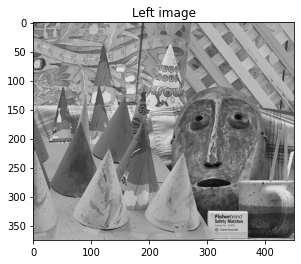

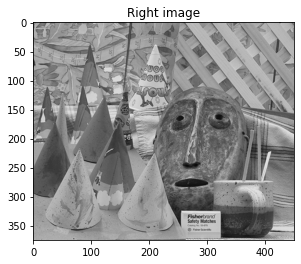

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

leftImg = Image.open("conesLeft.ppm")
rightImg = Image.open("conesRight.ppm")

gray_left = np.asarray(leftImg.convert('L'))
gray_right = np.asarray(rightImg.convert('L'))

plt.figure()
plt.imshow(gray_left, plt.cm.gray)
plt.title('Left image')

plt.figure()
plt.imshow(gray_right, plt.cm.gray)
plt.title('Right image')

Text(0.5, 1.0, 'New Right image')

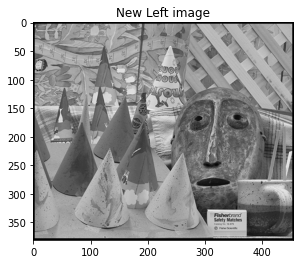

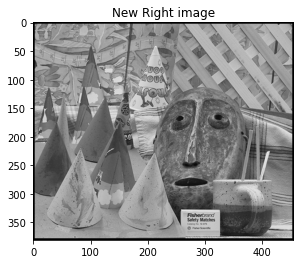

In [ ]:
# Get the size of the image
nrows, ncols = gray_left.shape  # 375 x 450

# Generate the depth image that has the same size with the original one
image_depth = np.zeros((nrows, ncols))
image_depth

# Add padding
new_gray_left = np.zeros((nrows + 2 * D, ncols + 2 * D))
new_gray_right = np.zeros((nrows + 2 * D, ncols + 2 * D))

new_gray_left[D:D+nrows,D:D+ncols] = gray_left
new_gray_right[D:D+nrows,D:D+ncols] = gray_right

plt.figure()
plt.imshow(new_gray_left, plt.cm.gray)
plt.title('New Left image')

plt.figure()
plt.imshow(new_gray_right, plt.cm.gray)
plt.title('New Right image')

# Helper Methods
- [im2col](https://www.mathworks.com/help/images/ref/im2col.html): Python equivalent of MATLAB's im2col method in "im2col.m"
  - ```
function b=im2col(varargin)
    [a, block, kind, padval] = parse_inputs(varargin{:});
    ...
    [ma,na] = size(a);
    m = block(1); n = block(2);
    
    if any([ma na] < [m n]) % if neighborhood is larger than image
        b = zeros(m*n,0);
        return
    end
    
    % Create Hankel-like indexing sub matrix.
    mc = block(1); nc = ma-m+1; nn = na-n+1;
    cidx = (0:mc-1)'; ridx = 1:nc;
    t = cidx(:,ones(nc,1)) + ridx(ones(mc,1),:);    % Hankel Subscripts
    tt = zeros(mc*n,nc);
    rows = 1:mc;
    for i=0:n-1,
        tt(i*mc+rows,:) = t+ma*i;
    end
    ttt = zeros(mc*n,nc*nn);
    cols = 1:nc;
    for j=0:nn-1,
        ttt(:,j*nc+cols) = tt+ma*j;
    end
    
    % If a is a row vector, change it to a column vector. This change is
    % necessary when A is a row vector and [M N] = size(A).
    if ndims(a) == 2 && na > 1 && ma == 1
        a = a(:);
    end
    b = a(ttt);
```
- normalize_matrix_col: Normalizes matrix by columns

In [ ]:
# Python equivalent of MATLAB's im2col.m method

# For our version, we are not worrying about distinct or sliding, as it is always sliding
def im2col(a, rows, cols):
  ma, na = a.shape
  m = rows
  n = cols
  mc = rows
  nc = ma-m+1
  nn = na-n+1
  cidx = np.arange(mc)
  np.reshape(len(cidx),1)
  ridx = range(1,nc)
  t = np.array(cidx) + 1 # 1;2;3;4;5;6;7
  tt = np.zeros((mc*n,nc))
  rows = np.arange(0,mc)

  for i in range(0, n):
    tt[i*mc+rows,:] = (t+ma*i).reshape(-1,1)
  ttt = np.zeros((mc*n,nc*nn))
  cols = np.arange(0,nc)
  for j in range(0,nn):
    ttt[:,j*nc+cols] = (tt+ma*j-1).reshape(-1,1)
  flatImg = a.T.flatten()
  b = flatImg[ttt.astype(int)]
  b = b.reshape(mc*n, nn)
  return b

In [ ]:
def normalize_matrix_col(mat):
  rows, cols = mat.shape
  N_M = np.zeros((rows, cols))
  Mean_M = mat.mean(axis=0)
  var_M = np.zeros(cols)
  for i in range(0, cols):
    N_M[:,i]=mat[:,i]-Mean_M[i]
  for i in range(0, cols):
    var_M[i]=np.dot((N_M[:,i]).T,N_M[:,i])
    var_M[i]=np.sqrt(var_M[i])
  for i in range(0, cols):
    N_M[:,i]=N_M[:,i]/var_M[i]
  return N_M

# Main loop thet repeats <code>nrows</code> times

# 2. Compute the Disparity Space Image (DSI) for each row of images, using Normalized Cross Correlation (NCC).
- Displarity space image is <code>ncolns * ncolns</code>
- <code>[nrows, ncolns] = size(imleftgray)</code>

# 3. Apply dynamic programing on the DSI image to find the path with the minimum cost from the top-left corner to the bottom-right corner. 

# 4. Back-trace the path and compute the disparity. 

# 5. Repeat steps (2)-(4) for each row of the image. 

# 6. Fill-in the occlusion. 

Start one row 0
Finish NCC
Start one row 1
Finish NCC
Start one row 2
Finish NCC
Start one row 3
Finish NCC
Start one row 4
Finish NCC
Start one row 5
Finish NCC
Start one row 6
Finish NCC
Start one row 7
Finish NCC
Start one row 8
Finish NCC
Start one row 9
Finish NCC
Start one row 10
Finish NCC
Start one row 11
Finish NCC
Start one row 12
Finish NCC
Start one row 13
Finish NCC
Start one row 14
Finish NCC
Start one row 15
Finish NCC
Start one row 16
Finish NCC
Start one row 17
Finish NCC
Start one row 18
Finish NCC
Start one row 19
Finish NCC
Start one row 20
Finish NCC
Start one row 21
Finish NCC
Start one row 22
Finish NCC
Start one row 23
Finish NCC
Start one row 24
Finish NCC
Start one row 25
Finish NCC
Start one row 26
Finish NCC
Start one row 27
Finish NCC
Start one row 28
Finish NCC
Start one row 29
Finish NCC
Start one row 30
Finish NCC
Start one row 31
Finish NCC
Start one row 32
Finish NCC
Start one row 33
Finish NCC
Start one row 34
Finish NCC
Start one row 35
Finish NCC
St

Text(0.5, 1.0, 'Right Image')

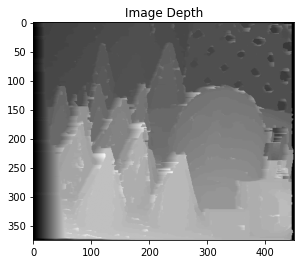

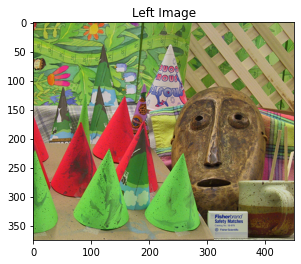

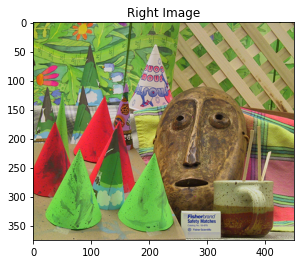

In [ ]:
for ii in range(0, nrows):
  # Each iteration processes one row and generates one DSI
  i = ii + D
  print("Start one row", ii)

  # NCC

  # 2.)
  # plt.plot(ii, normcc)

  DSI_image = np.zeros((ncols, ncols)) # 450 x 450

  # Generate a patch for NCC operation
  big_patch = new_gray_left[i-D:i+D+1,0:ncols+2*D] # 7 x 456
  f_matrix = im2col(big_patch,2*D+1,2*D+1) # 49 x 450
  f_matrix_N = normalize_matrix_col(f_matrix)
  big_patch = new_gray_right[i-D:i+D+1,0:ncols+2*D]
  g_matrix = im2col(big_patch,2*D+1,2*D+1)  

  # NCC Operation: Get 1 NCC
  g_matrix_N = normalize_matrix_col(g_matrix) 
  DSI_image = 1 - np.dot(g_matrix_N.T,f_matrix_N)
  print("Finish NCC")

  # plt.figure()
  # plt.imshow(DSI_image, plt.cm.gray)
  # plt.title("DSI at row " + str(ii))
  # plt.savefig('dsi.png')

  # 3.)
  # Dynamic program
  # minimum cost from the top-left corner to the bottom-right corner.


  dynamic_graph= np.zeros((ncols, ncols)) # 450 x 450
  directmap = np.zeros((ncols, ncols)) # 450 x 450
  pathmap = np.zeros((ncols, ncols)) # 450 x 450
  conclusion = 0.1

  # Initialize the upper edge and the left edge

  for pt in range(1, ncols):
    dynamic_graph[pt,0]=dynamic_graph[pt-1,0]+conclusion
    directmap[pt,0]=2
    dynamic_graph[0,pt]=dynamic_graph[0,pt-1]+conclusion
    directmap[0,pt]=3

  # Dynamic programming step 1
  for pti in range(1,ncols):
    for ptj in range(1,ncols):
      min1 = dynamic_graph[pti-1,ptj-1]+DSI_image[pti,ptj] # Diagonals path
      min2 = dynamic_graph[pti-1,ptj]+conclusion # Vertical path
      min3 = dynamic_graph[pti,ptj-1]+conclusion # Horizontal path
      m = min([min1, min2, min3])
      dynamic_graph[pti,ptj]=m
      if m == min1:
        directmap[pti,ptj]= 1
      elif m == min2:
        directmap[pti,ptj]= 2
      elif m == min3:
        directmap[pti,ptj]= 3

  # 4.)
  # Dynamic programming step 2
  p = ncols-1
  q = ncols-1

  while(p > 1 or q > 1):
    pathmap[p,q] = 1
    case = directmap[p,q]
    if case == 1:
      p = p-1
      q = q-1
      image_depth[ii,q] = abs(q-p)
    elif case == 2:
      p = p - 1
    elif case == 3:
      q = q - 1
      image_depth[ii,q] = abs(q-p)

  # plt.figure()
  # plt.imshow(pathmap, plt.cm.gray)
  # plt.title("Path at row " + str(ii))
  # plt.savefig('path.png')

# 5.) (Repeat steps 2-4 for each row of the image)

# 6.)
ma = np.max(image_depth)
image_depth = np.divide(image_depth, ma)

# Print the last DSI image
# plt.figure()
# plt.imshow(DSI_image, plt.cm.gray)

plt.figure()
plt.imshow(image_depth, plt.cm.gray)
plt.title("Image Depth")
plt.savefig('image_depth_O=0-5.png')

plt.figure()
plt.imshow(leftImg)
plt.title("Left Image")

plt.figure()
plt.imshow(rightImg)
plt.title("Right Image")


# Report
  1. Brief summary of what you think the project was about (what was the task; what were you trying to achieve)
    * **I think this project was primarily about getting comfortable with processes such as DSI computation and stereo matching with dynamic programming, as well as normalized-cross correlation. This project forces us to set up the images "by hand" to understand exactly how the data is being manipulated to output the disparity image depth, rather than having a built-in black-box function do it for us.**
  2. Brief outline of the algorithmic approach
    * **Import images**
    * **Convert images to greyscale**
    * **Add padding to greyscale images**
    * **For every row of pixels in the image**
      * **Compute the Disparity Space Image using Normalized Cross-Correlation (NCC)**
        * <img src="https://chart.apis.google.com/chart?cht=tx&chl=%5Chat%7Bf%7D%3D%5Cfrac%7Bf%20-%20%5Cbar%7Bf%7D%7D%7B%5Csqrt%7B%5Csum%7B(f-%5Cbar%7Bf%7D)%7D%5E2%7D%7D">
        * <img src="https://chart.apis.google.com/chart?cht=tx&chl=%5Chat%7Bg%7D%3D%5Cfrac%7Bg%20-%20%5Cbar%7Bg%7D%7D%7B%5Csqrt%7B%5Csum%7B(g-%5Cbar%7Bg%7D)%7D%5E2%7D%7D">
      * **For every cell along the top and left of the dynamic graph and direct map**
        * **Add conclusion and process direct map**
      * **For every row in dynamic graph**
        * **For every column in dynamic graph**
          * **Find lowest cost path**
      * **Using lowest cost path, generate scanline**
    * **Normalize image depth**
  3. Pictures of intermediate (e.g., a DSI image and its optimal path) and final results that convince me that the program does what you think it does

    * 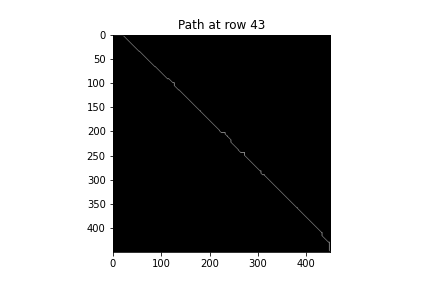
    * 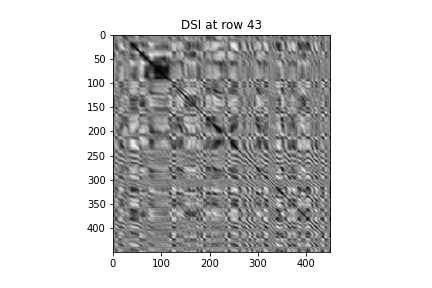
    * 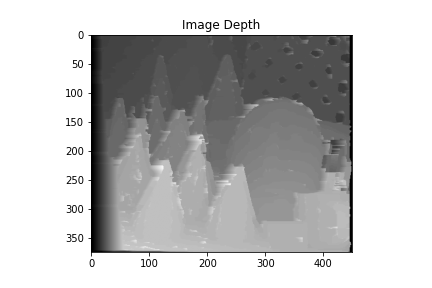
  4. Any design decisions you had to make, e.g., SSD or 1-NCC for dissimilarity measure, occlusion filling techniques, show the stereo reconstruction result on the coordinate system of left or right images
    * **For the most part, I just copy/pasted what was in the MATLAB project, so few decisions were made other than how I handled different functions not in Python/Jupyter libraries (e.g. im2col). The most difficult aspect of such was having to learn the syntax of MATLAB, as I have never used it before. The second most difficult thing was finding the differences in numpy arrays/matrices between those in MATLAB and my code when debugging. I ran the MATLAB code, taking a look at every matrix calculation, and compared it with my matrix in Python. If something was incorrect, I took a look at the line, and attempted to read it as if it was natural language. For example, the line**
```
ttt(:,j*nc+cols) = tt+ma*j;
```
    **can be read as: "Set ttt for all rows in the 'j*nc+cols' column equal to 'tt+ma*j'"**

  5. Experimental observations, e.g., the effect of different patch size and occlusion cost
    * **By shear observation, the patch size seems to determine the smoothness/sharpness of the objects, while the occlusion cost determines the blending and brightness of individual objects, in refence to the camera location.**
      * Higher patch size (D=7), conclusion = 0.1: 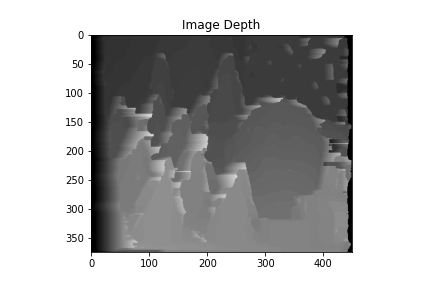
      * High occlusion (0.5), Patch size = 3: 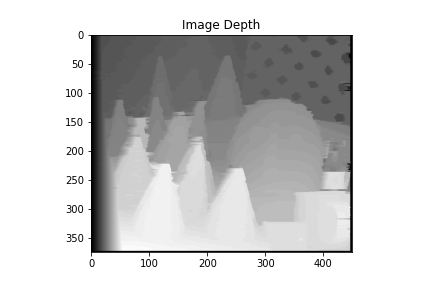